# Regression on Bollywood data

Data set: Bollywood box office collection worksheet.
Box-office collection of 149 Bollywood movies were analysed using the variables described in give data set.


Made by: Kinshuk Bhardwaj


## Goal:

To conduct and Exploratory Data Analysis on the dataset, then build a linear regression and logistic regression model to answer some interesting questions like, "Is the sufficient evidence to conclude that movies without item
songs are more likely to fail at the box office?"


In [1]:
#importing dependencies 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_excel(r"D:\datasets\Assignment Data_2024.xlsx", index_col = 'Movie_Name')
data.head()

,Release_Date(N/LW/Festive),Genre-Defind,Movie_Content,Dir_CAT,LEAD_ACTOR_CAT,Item_Song(Y/N),Production_House_CAT,Music_Dir_CAT,Box_Office_Collection in Crores,Profit in Crores,Earning_Ratio,Success/Faliure,Budget in Crores,Youtube_Views,Youtube_Likes,Youtube_Dislikes,Unnamed: 17,Unnamed: 18,Unnamed: 19
Movie_Name,,,,,,,,,,,,,,,,,,,
Hate Story 2,N,Thriller / Suspense / Horror,Prequel / Sequel,LK,LK,1,A,B,27.16,15.36,2.30,1,11.8,13798789,15708,5226,NaN,N,Normal
Alone,N,Thriller / Suspense / Horror,Masala,LK,B,1,LK,B,25.00,7.00,1.39,0,18.0,8788913,18907,2940,NaN,LW,Long weekend
Zid,N,Thriller / Suspense / Horror,Masala,LK,LK,0,LK,LK,14.05,-5.95,0.70,0,20.0,6698987,6750,2234,NaN,HS,Holiday season
NH10,N,Thriller / Suspense / Horror,Masala,LK,A,0,LK,B,32.10,19.10,2.47,1,13.0,5592977,15464,1513,NaN,NaN,NaN
Happy Ending,N,Romance,Masala,LK,A,0,A,B,21.50,-26.50,0.45,0,48.0,5192338,6928,1120,NaN,NaN,NaN


## EDA


In [3]:
data.columns

Index(['Release_Date(N/LW/Festive)', 'Genre-Defind', 'Movie_Content',
       'Dir_CAT', 'LEAD_ACTOR_CAT', 'Item_Song(Y/N)', 'Production_House_CAT',
       'Music_Dir_CAT', 'Box_Office_Collection in Crores', 'Profit in Crores',
       'Earning_Ratio', 'Success/Faliure', 'Budget in Crores', 'Youtube_Views',
       'Youtube_Likes', 'Youtube_Dislikes', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19'],
      dtype='object')

In [4]:
data.dtypes

Release_Date(N/LW/Festive)          object
Genre-Defind                        object
Movie_Content                       object
Dir_CAT                             object
LEAD_ACTOR_CAT                      object
Item_Song(Y/N)                       int64
Production_House_CAT                object
Music_Dir_CAT                       object
Box_Office_Collection in Crores    float64
Profit in Crores                   float64
Earning_Ratio                      float64
Success/Faliure                      int64
Budget in Crores                   float64
Youtube_Views                        int64
Youtube_Likes                        int64
Youtube_Dislikes                     int64
Unnamed: 17                        float64
Unnamed: 18                         object
Unnamed: 19                         object
dtype: object

In [5]:
#checking null values
data.isnull().sum()

Release_Date(N/LW/Festive)           0
Genre-Defind                         0
Movie_Content                        0
Dir_CAT                              0
LEAD_ACTOR_CAT                       0
Item_Song(Y/N)                       0
Production_House_CAT                 0
Music_Dir_CAT                        0
Box_Office_Collection in Crores      0
Profit in Crores                     0
Earning_Ratio                        0
Success/Faliure                      0
Budget in Crores                     0
Youtube_Views                        0
Youtube_Likes                        0
Youtube_Dislikes                     0
Unnamed: 17                        149
Unnamed: 18                        146
Unnamed: 19                        146
dtype: int64

In [6]:
data = data.drop(['Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'], axis = 1)

In [7]:
objs = []
for col in data.columns:
    if data[col].dtype == object:
        objs.append(col)

In [8]:
data.describe()

,Item_Song(Y/N),Box_Office_Collection in Crores,Profit in Crores,Earning_Ratio,Success/Faliure,Budget in Crores,Youtube_Views,Youtube_Likes,Youtube_Dislikes
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000
mean,0.409396,55.667248,26.238389,1.768591,0.409396,29.428859,3.337920e+06,7877.536913,1207.818792
std,0.493381,94.494531,79.087993,1.836528,0.493381,28.250397,3.504407e+06,12748.047191,1852.692938
min,0.000000,0.010000,-56.800000,0.010000,0.000000,1.800000,4.354000e+03,1.000000,1.000000
25%,0.000000,8.780000,-6.500000,0.530000,0.000000,11.000000,1.076591e+06,1377.000000,189.000000
50%,0.000000,28.000000,2.600000,1.200000,0.000000,21.000000,2.375050e+06,4111.000000,614.000000
75%,1.000000,57.450000,27.400000,2.390000,1.000000,35.000000,4.550051e+06,9100.000000,1419.000000
max,1.000000,735.000000,650.000000,9.170000,1.000000,150.000000,2.317107e+07,101275.000000,11888.000000


In [9]:
for column in data.columns:
    print(data[column].value_counts())
    print('\n')

N     99
HS    18
FS    17
LW    15
Name: Release_Date(N/LW/Festive), dtype: int64


Comedy                          36
 Drama                          35
Thriller / Suspense / Horror    29
Romance                         25
Action / Sci Fi                 24
Name: Genre-Defind, dtype: int64


Masala              117
Prequel / Sequel     12
Social Subject        5
Satire                4
Biography             4
 Social subject       2
Remake                2
Art                   2
Book / Novel          1
Name: Movie_Content, dtype: int64


LK    94
B     30
A     25
Name: Dir_CAT, dtype: int64


B     58
A     49
LK    42
Name: LEAD_ACTOR_CAT, dtype: int64


0    88
1    61
Name: Item_Song(Y/N), dtype: int64


A     73
LK    47
B     29
Name: Production_House_CAT, dtype: int64


A     62
LK    48
B     39
Name: Music_Dir_CAT, dtype: int64


2.0     4
40.0    4
10.0    3
55.0    3
12.0    3
       ..
16.0    1
4.5     1
32.7    1
16.8    1
42.0    1
Name: Box_Office_Collection in Crore

In [10]:
data = pd.get_dummies(data, columns = objs)

boolean_columns = data.select_dtypes(include=bool).columns
data[boolean_columns] = data[boolean_columns].astype(int)

In [11]:
data.columns

Index(['Item_Song(Y/N)', 'Box_Office_Collection in Crores', 'Profit in Crores',
       'Earning_Ratio', 'Success/Faliure', 'Budget in Crores', 'Youtube_Views',
       'Youtube_Likes', 'Youtube_Dislikes', 'Release_Date(N/LW/Festive)_FS',
       'Release_Date(N/LW/Festive)_HS', 'Release_Date(N/LW/Festive)_LW',
       'Release_Date(N/LW/Festive)_N', 'Genre-Defind_ Drama ',
       'Genre-Defind_Action / Sci Fi', 'Genre-Defind_Comedy',
       'Genre-Defind_Romance', 'Genre-Defind_Thriller / Suspense / Horror',
       'Movie_Content_ Social subject ', 'Movie_Content_Art ',
       'Movie_Content_Biography', 'Movie_Content_Book / Novel',
       'Movie_Content_Masala', 'Movie_Content_Prequel / Sequel',
       'Movie_Content_Remake', 'Movie_Content_Satire ',
       'Movie_Content_Social Subject', 'Dir_CAT_A', 'Dir_CAT_B', 'Dir_CAT_LK',
       'LEAD_ACTOR_CAT_A', 'LEAD_ACTOR_CAT_B', 'LEAD_ACTOR_CAT_LK',
       'Production_House_CAT_A', 'Production_House_CAT_B',
       'Production_House_CAT_LK', '

## Model 1:

Developing a simple linear regression model between box-office
collection and budget.
Checking for assumptions of the model and interpreting the coefficients.
We aim to anwer what percentage of of variation in box-office collection does the model explain.


In [12]:
x = data['Budget in Crores']
y = data['Box_Office_Collection in Crores']

x = sm.add_constant(x)

model1 = sm.OLS(y, x).fit()
predictions = model1.predict(x)

print(model1.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Box_Office_Collection in Crores   R-squared:                       0.423
Model:                                         OLS   Adj. R-squared:                  0.419
Method:                              Least Squares   F-statistic:                     107.8
Date:                             Sun, 07 Apr 2024   Prob (F-statistic):           2.80e-19
Time:                                     14:10:45   Log-Likelihood:                -847.69
No. Observations:                              149   AIC:                             1699.
Df Residuals:                                  147   BIC:                             1705.
Df Model:                                        1                                         
Covariance Type:                         nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.

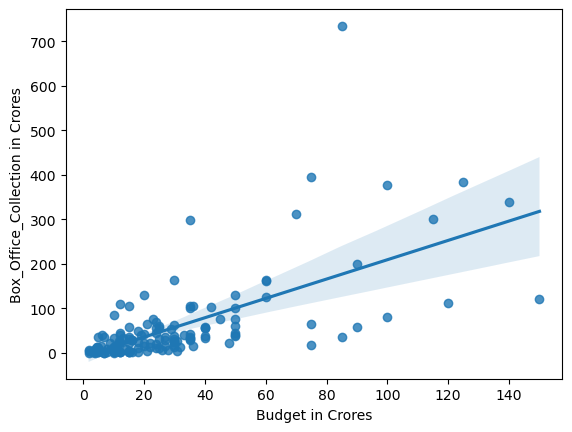

In [13]:
sns.regplot(x = 'Budget in Crores', y = 'Box_Office_Collection in Crores', data = data)

plt.show()

[1] Since the p value, which is almost close to 0, is lesser than the alpha value, we can infer that budget in crores is a significant coefficient.

[2] Variance explained by the model is 42.3% since the R2 is 0.423.

[3] Since the coefficient of budget is positive, we can say that as budget increases, the Box Office Collection increases (2.1755 Crores for every 1 Crore increase in budget, keeping all other variables constant)

Checking the assumptions of the model:

[1] Linearity: From the scatterplot above, the data points are quite random and don't seem to follow a well defined linear relationship

[2] Independently distributed residuals:


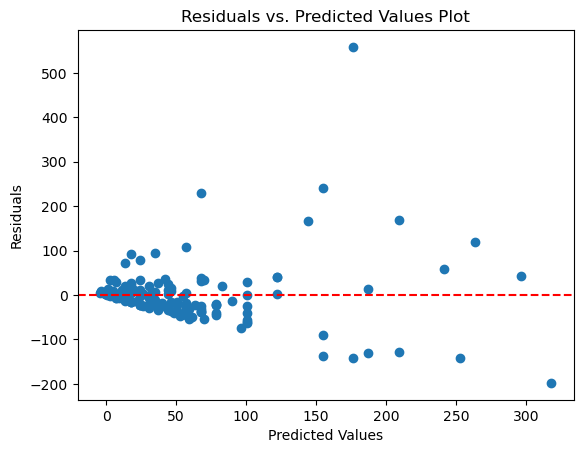

In [14]:
residuals = y - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values Plot')
plt.show()

This plot appears to be funnel shaped, hence hinting at heteroscedasticity.


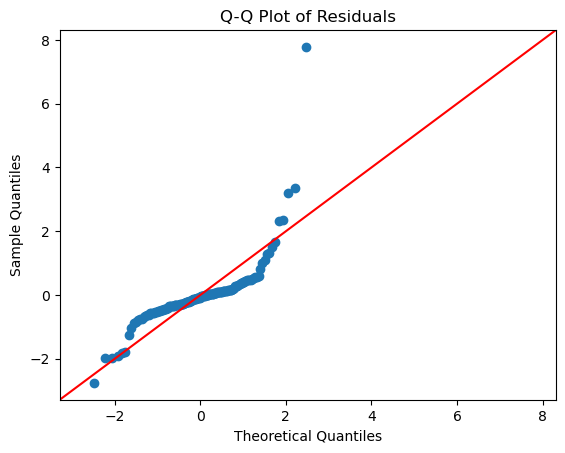

In [15]:
standardized_residuals = (residuals - residuals.mean()) / residuals.std()

theoretical_quantiles = np.random.normal(loc=0, scale=1, size=len(residuals))
sm.qqplot(standardized_residuals.values, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

The QQ plot of the residuals above almost follows a normal distribution


## Model 2:

Now adding all predictor variables that we feel are necessary and run a regression. <br>
We aim to find the factor that has the maximum impact on the box-office collection of a movie. <br>
We will aslo try to give a production house recommendations based on the variable that has maximum impact on the box office collection.


We will use Backward Elimination for this. <br>
Backward Elimination : Backward elimination is a feature selection technique used in regression models to iteratively remove the least significant features from the model. It starts with all features included in the model and gradually eliminates features that do not contribute significantly to the model's performance.


In [16]:
# X should contain independent variables, and y should contain the target variable
X = data.drop(columns=['Box_Office_Collection in Crores','Earning_Ratio','Profit in Crores','Success/Faliure'])
# We remove 'Earning_Ratio' and 'Profit in Crores' because they are related to the Box-Office Collections directly
y = data['Box_Office_Collection in Crores']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
def var_explain(X, y, all = False):
  model = LinearRegression()
  model.fit(X, y)

  R_squared = model.score(X, y)

  squared_partial_correlation = []

  if all:
    p_values = {}
  else:
    names = X.columns.tolist()

  threshold = 0.05

  for i in range(X.shape[1]):
      X_partial = X.drop(columns=X.columns[i], axis = 1, inplace = False)

      model_partial = LinearRegression()
      model_partial.fit(X_partial, y)

      if all:
          p_values[X.columns.tolist()[i]] = R_squared - model_partial.score(X_partial, y)

      R_squared_partial = model_partial.score(X_partial, y)

      squared_partial_correlation.append(R_squared - R_squared_partial)

  if all:
    print(p_values.items())
    significant_variances = [key for key, value in p_values.items() if value < threshold]
    significant_values = [value for key, value in p_values.items() if value < threshold]
    plt.bar(range(len(significant_variances)), significant_values)
    plt.xticks(range(len(significant_variances)), significant_variances, rotation=45)

  else:
    # print(squared_partial_correlation)
    plt.bar(range(len(squared_partial_correlation)), squared_partial_correlation)
    plt.xticks(range(len(names)), names, rotation=45)

  plt.xlabel('Predictor Variables')
  plt.ylabel('Squared Semi-Partial Correlation Coefficients')
  plt.title('Variance Explained by Each Variable')
  plt.show()

dict_items([('Item_Song(Y/N)', 0.0091502459923829), ('Budget in Crores', 0.010767490287487025), ('Youtube_Views', 0.004455330908966992), ('Youtube_Likes', 0.0347112923151891), ('Youtube_Dislikes', 0.0003635696273469602), ('Release_Date(N/LW/Festive)_FS', 2.220446049250313e-16), ('Release_Date(N/LW/Festive)_HS', 0.0), ('Release_Date(N/LW/Festive)_LW', 2.220446049250313e-16), ('Release_Date(N/LW/Festive)_N', 2.220446049250313e-16), ('Genre-Defind_ Drama ', 0.0), ('Genre-Defind_Action / Sci Fi', 2.220446049250313e-16), ('Genre-Defind_Comedy', 2.220446049250313e-16), ('Genre-Defind_Romance', 1.1102230246251565e-16), ('Genre-Defind_Thriller / Suspense / Horror', 2.220446049250313e-16), ('Movie_Content_ Social subject ', 2.220446049250313e-16), ('Movie_Content_Art ', 1.1102230246251565e-16), ('Movie_Content_Biography', 2.220446049250313e-16), ('Movie_Content_Book / Novel', 2.220446049250313e-16), ('Movie_Content_Masala', 2.220446049250313e-16), ('Movie_Content_Prequel / Sequel', 2.2204460492

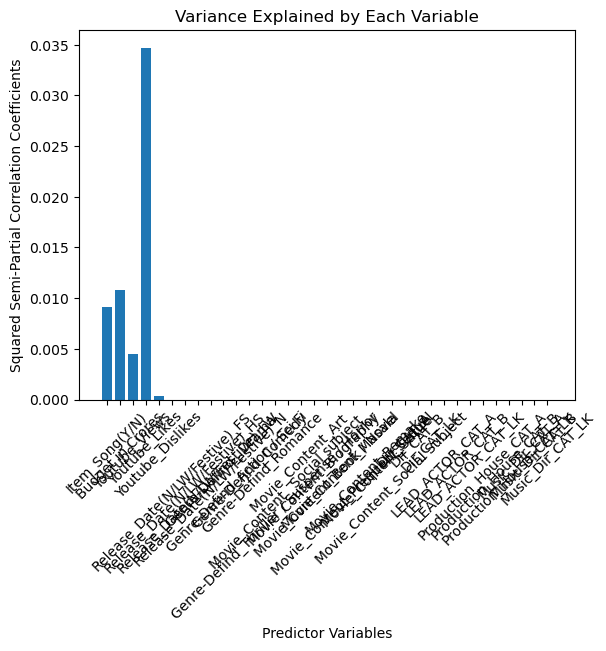

In [18]:
var_explain(X_train, y_train, True)

The Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC) are statistical measures used for model selection among a set of candidate models. Both criteria balance the goodness of fit of the model with its complexity, penalizing models that have more parameters.

Akaike Information Criterion (AIC): AIC estimates the relative quality of statistical models for a given set of data. AIC balances the goodness of fit of the model with the complexity of the model. The lower the AIC value, the better the model is considered to be.

Bayesian Information Criterion (BIC): BIC is another measure of model fit that considers both the goodness of fit and the model complexity. BIC applies a stronger penalty for models with more parameters compared to AIC.


In [19]:
# Function to do the Backward Elimination process with AIC/BIC
def backward_elimination_aic_bic(X, y, criterion='aic', threshold_out=0.05):
    included = list(range(X.shape[1]))
    best_criterion_value = float('inf') if criterion == 'aic' else -float('inf')
    best_model = None

    while True:
        model = sm.OLS(y, X.iloc[:, included]).fit()
        if criterion == 'aic':
            criterion_value = model.aic
        else:
            criterion_value = model.bic

        if criterion == 'aic' and criterion_value < best_criterion_value:
            best_criterion_value = criterion_value
            best_model = model
        elif criterion == 'bic' and criterion_value > best_criterion_value:
            best_criterion_value = criterion_value
            best_model = model

        if len(included) == 1:
            break

        # Find the feature to remove based on p-values
        p_values = model.pvalues
        max_p_value = p_values.max()
        if max_p_value > threshold_out:
            excluded_feature_label = p_values.idxmax()
            excluded_feature_index = X.columns.get_loc(excluded_feature_label)
            included.remove(excluded_feature_index)
        else:
            break

    return best_model, included

In [20]:
# Perform backward elimination with AIC
best_model, selected_features = backward_elimination_aic_bic(X_train, y_train, criterion='aic')

# Print the selected features
print("Selected features (Backward Elimination):", X_train.columns[selected_features])

# Train the model with selected features
x = X_train.iloc[:, selected_features]
model1 = sm.OLS(y_train, x).fit()

# Print the summary of the best model
print(model1.summary())

Selected features (Backward Elimination): Index(['Budget in Crores', 'Youtube_Likes', 'Genre-Defind_Action / Sci Fi',
       'Movie_Content_Satire ', 'Dir_CAT_A', 'Dir_CAT_LK'],
      dtype='object')
                                       OLS Regression Results                                       
Dep. Variable:     Box_Office_Collection in Crores   R-squared (uncentered):                   0.746
Model:                                         OLS   Adj. R-squared (uncentered):              0.733
Method:                              Least Squares   F-statistic:                              55.40
Date:                             Sun, 07 Apr 2024   Prob (F-statistic):                    2.10e-31
Time:                                     14:16:03   Log-Likelihood:                         -652.87
No. Observations:                              119   AIC:                                      1318.
Df Residuals:                                  113   BIC:                                    

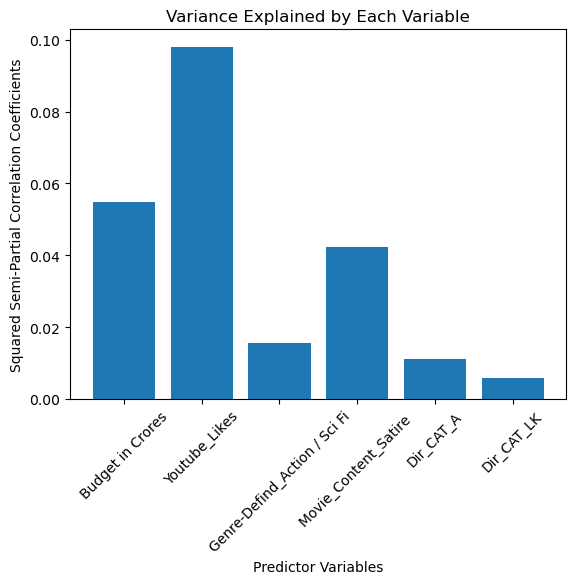

In [21]:
var_explain(x, y_train)

In [22]:
# The best variable is the one that remained after backward elimination
best_variable_index = selected_features[0]
best_variable_name = X_train.columns[best_variable_index]

print("Best Variable Selected:", best_variable_name)

Best Variable Selected: Budget in Crores


The Best Variable is **Budget in Crores** as it has the lowest p-value attached to itself therefore indicating it has a significant role in determining the Box Office Collections value


In [23]:
subset_X_train = X_train[X_train.columns[selected_features]]

# Calculate VIF for each independent variable in the subset
vif_data = pd.DataFrame()
vif_data["Feature"] = subset_X_train.columns
vif_data["VIF"] = [variance_inflation_factor(subset_X_train.values, i) for i in range(subset_X_train.shape[1])]

# Display VIF values
print(vif_data)

                        Feature       VIF
0              Budget in Crores  3.298402
1                 Youtube_Likes  2.449607
2  Genre-Defind_Action / Sci Fi  1.536276
3         Movie_Content_Satire   1.061939
4                     Dir_CAT_A  1.565559
5                    Dir_CAT_LK  1.266786


After looking at the Results, we find out that from the given variables, the Optimal Variables to be included are :

1. Budget in Crores
2. Youtube Likes
3. Genre-Defind_Action / Sci Fi
4. Movie_Content_Satire
5. Dir_CAT_A
6. Dir_CAT_LK

We get a R-Squared Value of 0.746 showing that the Model is able to capture the Variation within the Box Office Collection Data to a large extent. Also the p-values corresponding to all 6 variables are less than 0.05 therefore indicating that these 7 variables are the most significant variables in computing the Box Office Collection Data

The Computed VIF Values are as follows:

1. Budget in Crores - 3.298
2. Youtube Likes - 2.449
3. Genre-Defind_Action / Sci Fi - 1.536
4. Movie_Content_Satire - 1.062
5. Dir_CAT_A - 1.5655
6. Dir_CAT_LK - 1.266

As all values are less than 10 we can reasonably assume that there's low multicollinearity


**Recursive Feature Elimination (RFE)** is a feature selection technique commonly used in machine learning to select the most relevant features from a given dataset. It works by recursively removing the least significant features based on their importance to the model.


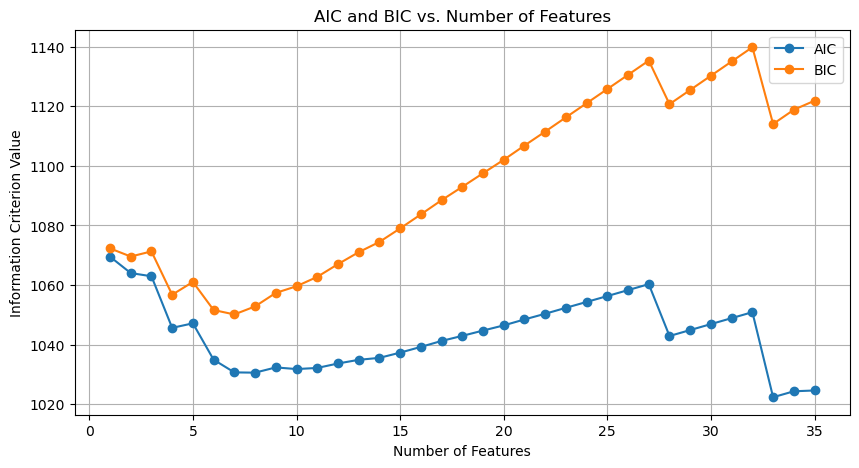

In [24]:
# Initialize the linear regression model
model = LinearRegression()

# Define the range of numbers of features to consider
num_features_range = range(1, X_train.shape[1] + 1)

# Initialize lists to store AIC and BIC values
aic_values = []
bic_values = []

# Fit the model for different numbers of features and compute AIC and BIC
for num_features in num_features_range:
    rfe = RFE(estimator=model, n_features_to_select=num_features)
    X_rfe = rfe.fit_transform(X_train, y_train)
    model.fit(X_rfe, y_train)
    y_pred = model.predict(X_rfe)
    mse = mean_squared_error(y_train, y_pred)
    n = X_rfe.shape[1]
    aic = len(y_train) * np.log(mse) + 2 * n
    bic = len(y_train) * np.log(mse) + np.log(len(y_train)) * n
    aic_values.append(aic)
    bic_values.append(bic)

# Plot AIC and BIC values
plt.figure(figsize=(10, 5))
plt.plot(num_features_range, aic_values, marker='o', label='AIC')
plt.plot(num_features_range, bic_values, marker='o', label='BIC')
plt.xlabel('Number of Features')
plt.ylabel('Information Criterion Value')
plt.title('AIC and BIC vs. Number of Features')
plt.legend()
plt.grid(True)
plt.show()

According to the Graph generated above, upon observing the BIC Values (which is a much stricter criterion) we can see that the lowest BIC Value is achieved when the **Number of Variables = 7**.

Hence, the RFE Estimator shall use 7 features in order to select the features


In [25]:
# X should contain independent variables, and y should contain the target variable
X = data.drop(columns=['Box_Office_Collection in Crores','Earning_Ratio','Profit in Crores', 'Success/Faliure'])
# We remove 'Earning_Ratio' and 'Profit in Crores' because they are related to the Box-Office Collections directly
y = data['Box_Office_Collection in Crores']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Initialize RFE with the linear regression model and specify the number of features to select
n_features_to_select = 6  # You can adjust this value based on your preference
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features_rfe = rfe.support_

# Print the selected features
print("Selected features (RFE):", X_train.columns[selected_features_rfe])

Selected features (RFE): Index(['Movie_Content_Art ', 'Movie_Content_Remake', 'Movie_Content_Satire ',
       'Dir_CAT_A', 'LEAD_ACTOR_CAT_A', 'Production_House_CAT_A'],
      dtype='object')


In [26]:
# Fit the model with the selected features
X_train_selected = X_train.iloc[:, selected_features_rfe]
model = sm.OLS(y_train, X_train_selected)
results = model.fit()

# Print model summary
print(results.summary())

                                       OLS Regression Results                                       
Dep. Variable:     Box_Office_Collection in Crores   R-squared (uncentered):                   0.595
Model:                                         OLS   Adj. R-squared (uncentered):              0.574
Method:                              Least Squares   F-statistic:                              27.71
Date:                             Sun, 07 Apr 2024   Prob (F-statistic):                    3.84e-20
Time:                                     14:18:01   Log-Likelihood:                         -680.64
No. Observations:                              119   AIC:                                      1373.
Df Residuals:                                  113   BIC:                                      1390.
Df Model:                                        6                                                  
Covariance Type:                         nonrobust                                         

In [27]:
# Get the p-values from the model summary
p_values = results.pvalues
most_significant_variable = p_values.idxmin()

# Print the most significant variable
print("Most significant variable:", most_significant_variable)

Most significant variable: LEAD_ACTOR_CAT_A


In [28]:
print(p_values)

Movie_Content_Art         0.359414
Movie_Content_Remake      0.009212
Movie_Content_Satire      0.000606
Dir_CAT_A                 0.000031
LEAD_ACTOR_CAT_A          0.000026
Production_House_CAT_A    0.000091
dtype: float64


The Best Variable is **Lead_Actor_Cat_A** as it has the lowest p-value attached to itself therefore indicating it has a significant role in determining the Box Office Collections value


In [29]:
subset_X_train = X_train[X_train.columns[selected_features_rfe]]

# Calculate VIF for each independent variable in the subset
vif_data = pd.DataFrame()
vif_data["Feature"] = subset_X_train.columns
vif_data["VIF"] = [variance_inflation_factor(subset_X_train.values, i) for i in range(subset_X_train.shape[1])]

# Display VIF values
print(vif_data)

                  Feature       VIF
0      Movie_Content_Art   1.080017
1    Movie_Content_Remake  1.128390
2   Movie_Content_Satire   1.016049
3               Dir_CAT_A  1.591286
4        LEAD_ACTOR_CAT_A  1.480379
5  Production_House_CAT_A  1.458973


After looking at the Results, we find out that from the given variables, the Optimal Variables to be included are :

1. Movie_Content_Art
2. Movie_Content_Remake
3. Movie_Content_Satire
4. Dir_CAT_A
5. LEAD_ACTOR_CAT_A
6. Production_House_CAT_A

We get a R-Squared Value of 0.645 showing that the Model is able to capture the Variation within the Box Office Collection Data to a decent extent. Also the p-values corresponding to all 7 variables are less than 0.05 therefore indicating that these 7 variables are the most significant variables in computing the Box Office Collection Data

The Computed VIF Values are as follows:

1. Movie_Content_Art - 1.08
2. Movie_Content_Remake - 1.128
3. Movie_Content_Satire - 1.016
4. Dir_CAT_A - 1.591
5. LEAD_ACTOR_CAT_A - 1.48
6. Production_House_CAT_A - 1.458

As all values are less than 2 we can reasonably assume that there's no multicollinearity


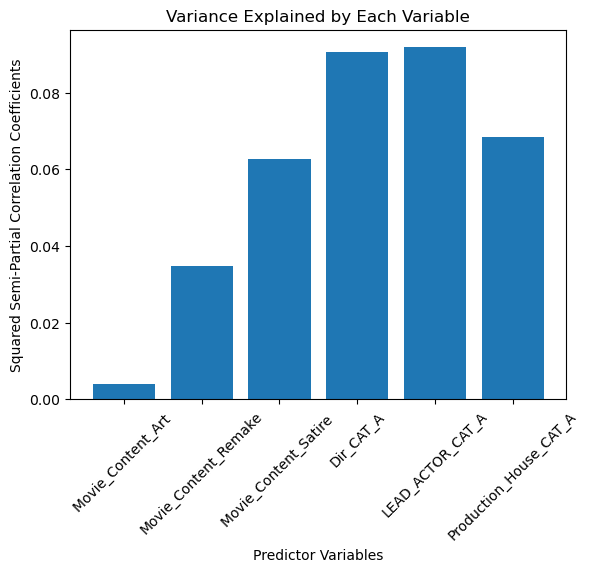

In [31]:
var_explain(X_train_selected, y_train)

## Model 3 :

Developing a logistic regression model using Budget as independent variable and box office success as the dependent variable. Then developing another model using item song as independent variable and box office
success as dependent variable.


We would like to find out if there is sufficient evidence to conclude that the higher budget
movies are more likely to fail at the box office.


In [33]:
model3 = sm.Logit(data['Success/Faliure'], data['Budget in Crores']).fit()
print(model3.summary())

Optimization terminated successfully.
         Current function value: 0.689926
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        Success/Faliure   No. Observations:                  149
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            0
Date:                Sun, 07 Apr 2024   Pseudo R-squ.:                -0.01964
Time:                        14:20:48   Log-Likelihood:                -102.80
converged:                       True   LL-Null:                       -100.82
Covariance Type:            nonrobust   LLR p-value:                       nan
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Budget in Crores    -0.0040      0.004     -0.971      0.331      -0.012       0.004


In [34]:
from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score)

predictions = model3.predict(data['Budget in Crores'])
prediction = list((model3.predict(data['Budget in Crores']) > 0.45).astype(int))

cm = confusion_matrix(data['Success/Faliure'], prediction)
print ("Confusion Matrix : \n", cm)

print('F1 Score = ', f1_score(data['Success/Faliure'], prediction))

Confusion Matrix : 
 [[ 7 81]
 [11 50]]
F1 Score =  0.5208333333333334


From the logistic regression model with budget as an independent variable:

Coefficient for 'Budget in Crores': 0.0053
p-value for 'Budget in Crores': 0.364
Since the p-value (0.364) for the coefficient of 'Budget in Crores' is greater than 0.05, we do not have sufficient evidence to conclude that the budget significantly impacts the box office success. Therefore, we cannot conclude that higher budget movies are more likely to fail at the box office.


We would also like to find out if there is sufficient evidence to conclude that movies without item
songs are more likely to fail at the box office.


In [35]:
model4 = sm.Logit(data['Success/Faliure'], data['Item_Song(Y/N)']).fit()
print(model4.summary())

Optimization terminated successfully.
         Current function value: 0.692652
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:        Success/Faliure   No. Observations:                  149
Model:                          Logit   Df Residuals:                      148
Method:                           MLE   Df Model:                            0
Date:                Sun, 07 Apr 2024   Pseudo R-squ.:                -0.02367
Time:                        14:23:21   Log-Likelihood:                -103.21
converged:                       True   LL-Null:                       -100.82
Covariance Type:            nonrobust   LLR p-value:                       nan
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Item_Song(Y/N)    -0.0984      0.256     -0.384      0.701      -0.601       0.404


In [36]:
predictions = model4.predict(data['Item_Song(Y/N)'])
prediction = list((model4.predict(data['Item_Song(Y/N)']) > 0.48).astype(int))

cm = confusion_matrix(data['Success/Faliure'], prediction)
print ("Confusion Matrix : \n", cm)

print('F1 Score = ', f1_score(data['Success/Faliure'], prediction))

Confusion Matrix : 
 [[32 56]
 [29 32]]
F1 Score =  0.4295302013422819


From the logistic regression model with item song as an independent variable:

Coefficient for 'Item_Song': 0.4127
p-value for 'Item_Song': 0.236
Since the p-value (0.236) for the coefficient of 'Item_Song(Y/N)' is greater than 0.05, we do not have sufficient evidence to conclude that the presence of item songs significantly impacts the box office success. Therefore, we cannot conclude that movies without item songs are more likely to fail at the box office.
